In [1]:
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
import pandas as pd

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.7.0_75"; Java(TM) SE Runtime Environment (build 1.7.0_75-b13); Java HotSpot(TM) 64-Bit Server VM (build 24.75-b04, mixed mode)
  Starting server from /Users/taj/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/4p/wz6bkm9n4gv881hh50tvj8k80000gn/T/tmp4qndufie
  JVM stdout: /var/folders/4p/wz6bkm9n4gv881hh50tvj8k80000gn/T/tmp4qndufie/h2o_taj_started_from_python.out
  JVM stderr: /var/folders/4p/wz6bkm9n4gv881hh50tvj8k80000gn/T/tmp4qndufie/h2o_taj_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Australia/Sydney
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.8
H2O cluster version age:,"21 days, 17 hours and 41 minutes"
H2O cluster name:,H2O_from_python_taj_ugsshm
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:

df_1 = pd.read_csv('./housing_sample.csv')

# Drop Property_ID and Postcode and Extracted_At date, Reviews and Review_Count are duplicates drop one
# Drop the council ID, the postcode should be enough identifier

df_2 = df_1.drop(['property_id','postcode','ext_at','reviews','council_id'],axis=1)



df_3 = h2o.H2OFrame(df_2)
#df_3.summary()


df = df_3

#df_2[['review_count','review_value']].head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
y = 'total_booked_days'
x = df.col_names
x.remove(y)
print("Response = " + y)
print("Predictors = " + str(x))

Response = total_booked_days
Pridictors = ['bathrooms', 'bedrooms', 'beds', 'description_wc', 'guests', 'init_price', 'syd_brg_deg', 'syd_dist_km', 'suburb_id', 'photos', 'review_count', 'review_value', 'f_balcony', 'f_books', 'f_child_s_high_chair', 'f_children_welcome', 'f_clothes_dryer', 'f_deck_patio', 'f_dining', 'f_dishes_and_utensils', 'f_dishwasher', 'f_dvd_player', 'f_fireplace', 'f_heating', 'f_internet_access', 'f_iron_and_board', 'f_kitchen', 'f_lawn_garden', 'f_living_room', 'f_microwave', 'f_non_smoking', 'f_outdoor_grill', 'f_oven', 'f_parking', 'f_refrigerator', 'f_satellite_cable', 'f_stereo', 'f_stove', 'f_television', 'f_toaster', 'f_toys', 'f_washing_machine', 'f_wood_stove', 'f_coffee_maker', 'f_games', 'f_hair_dryer', 'f_linens_provided', 'f_pets_allowed', 'f_tennis', 'f_towels_provided', 'f_video_library', 'f_wheelchair_accessible', 'f_air_conditioning', 'f_games_room', 'f_garage', 'f_hot_tub', 'f_long_term_renters_welcome', 'f_video_games', 'f_private_pool', 'f_

In [5]:
df['total_booked_days'] = df['total_booked_days'].asfactor()

In [6]:
#df['total_booked_days'].levels()
#[['0', '1']]

In [7]:
train, valid, test = df.split_frame(ratios=[.8, .1])
print(df.shape)
print(train.shape)
print(valid.shape)
print(test.shape)

(18992, 74)
(15228, 74)
(1896, 74)
(1868, 74)


In [8]:
#from h2o.estimators.gbm import H2OGradientBoostingEstimator
#gbm = H2OGradientBoostingEstimator()
#gbm.train(x=x, y =y, training_frame=train, validation_frame=valid)

In [9]:
#gbm.confusion_matrix(valid)

In [10]:
#gbm.varimp_plot()

In [11]:
#gbm.varimp()

In [12]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
drf = H2ORandomForestEstimator()
drf.train(x=x, y = y, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [13]:
#drf.confusion_matrix()

In [14]:
drf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1526002129794_1


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.2954896715761677
RMSE: 0.5435896168767094
LogLoss: 4.80855874724385
Mean Per-Class Error: 0.9006970450764229
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,82,86,89,90,98,105,111,124,130,162,Error,Rate
11447.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0012215,"14 / 11,461"
37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37 / 37
211.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9723502,211 / 217
188.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9642857,189 / 196
168.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9545455,168 / 176
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.7625427
2,0.7781061
3,0.7841476
4,0.7887444
5,0.7922905
6,0.7949829
7,0.798726
8,0.8016811
9,0.8048332
10,0.8077882



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.30650325557237457
RMSE: 0.5536273616543663
LogLoss: 3.8510926131127183
Mean Per-Class Error: 0.6227163614069386
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,82,86,89,90,98,105,111,124,130,162,Error,Rate
1393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,393"
6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8571429,6 / 7
29.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9354839,29 / 31
29.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9354839,29 / 31
23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9583333,23 / 24
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.


See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.7473629
2,0.7700422
3,0.7763713
4,0.7837552
5,0.7885021
6,0.7932489
7,0.8001055
8,0.8053797
9,0.806962
10,0.8111814


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2018-05-11 11:28:56,0.112 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-05-11 11:28:59,2.593 sec,1.0,0.6104661,10.8280938,0.3624221,0.6253655,11.4584548,0.3765823
,2018-05-11 11:29:00,3.800 sec,2.0,0.6043756,10.3226236,0.3456140,0.5793088,8.4011205,0.2921941
,2018-05-11 11:29:05,8.469 sec,6.0,0.5733767,8.2508837,0.2857344,0.5610915,6.4987067,0.2589662
,2018-05-11 11:29:10,13.382 sec,11.0,0.5556576,6.9210858,0.2541768,0.5567579,5.8935610,0.2526371
,2018-05-11 11:29:15,18.428 sec,16.0,0.5496704,6.3170159,0.2451715,0.5561521,5.6174787,0.2510549
,2018-05-11 11:29:20,24.110 sec,22.0,0.5466478,5.8903102,0.2406751,0.5548828,5.0371946,0.2521097
,2018-05-11 11:29:30,33.864 sec,32.0,0.5446528,5.4031153,0.2383767,0.5542606,4.4639760,0.2515823
,2018-05-11 11:29:46,49.528 sec,47.0,0.5438548,4.8943113,0.2375230,0.5536206,3.9674195,0.2526371
,2018-05-11 11:29:50,53.719 sec,50.0,0.5435896,4.8085587,0.2374573,0.5536274,3.8510926,0.2526371


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
description_wc,12636.6132812,1.0,0.0812137
suburb_id,9678.5683594,0.7659147,0.0622028
photos,9193.1289062,0.7274994,0.0590829
syd_dist_km,9192.9628906,0.7274863,0.0590818
init_price,8432.0644531,0.6672725,0.0541917
---,---,---,---
f_fitness_room_equipment,321.0486145,0.0254062,0.0020633
f_sauna,237.5530090,0.0187988,0.0015267
f_indoor_pool,232.6056671,0.0184073,0.0014949
f_free_wifi,82.1939240,0.0065044,0.0005282



See the whole table with table.as_data_frame()


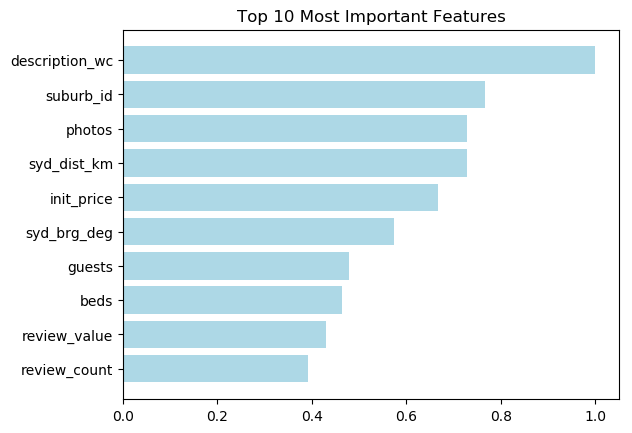

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()
variables = drf._model_json['output']['variable_importances']['variable'][0:10]
y_pos = np.arange(len(variables))
scaled_importance = drf._model_json['output']['variable_importances']['scaled_importance'][0:10]
ax.barh(y_pos, scaled_importance, align='center', color='lightblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
#ax.set_xlabel('Scaled Importance')
ax.set_title('Top 10 Most Important Features')
plt.show()

In [16]:
drf._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,description_wc,12636.613281,1.000000,0.081214
1,suburb_id,9678.568359,0.765915,0.062203
2,photos,9193.128906,0.727499,0.059083
3,syd_dist_km,9192.962891,0.727486,0.059082
4,init_price,8432.064453,0.667272,0.054192
5,syd_brg_deg,7245.683105,0.573388,0.046567
6,guests,6035.936523,0.477655,0.038792
7,beds,5866.990723,0.464285,0.037706
8,review_value,5437.934082,0.430332,0.034949
9,review_count,4950.512207,0.391759,0.031816
